In [1027]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Import Statsmodels
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse, aic

In [1028]:
df_future = pd.read_csv('Final data.csv')

In [1029]:
df_future

,Date,CPI,Median Annual Income,Population Estimate,Petrol Price,Diesel Price,Google Search Index,All Cars,ULEV
0,31-10-2011,94.5,26719.28962,430572.0765,1.3473,1.4027,23.0,206427.0,31.0
1,30-11-2011,94.6,26652.97814,430979.3716,1.3317,1.4110,22.0,207544.0,31.0
2,31-12-2011,95.1,26584.45628,431400.2432,1.3241,1.4077,12.0,208700.0,31.0
3,31-01-2012,94.6,26515.93443,431821.1148,1.3410,1.4245,21.0,209690.0,31.0
4,29-02-2012,95.1,26451.83333,432214.8333,1.3621,1.4392,26.0,210618.0,33.0
...,...,...,...,...,...,...,...,...,...
178,31-08-2026,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
179,30-09-2026,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
180,31-10-2026,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
181,30-11-2026,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [1030]:
df_future['Date']=pd.to_datetime(df_future['Date'])

In [1031]:
df_future.set_index('Date', inplace=True)

In [1032]:
df_future.isna().sum()

CPI                     65
Median Annual Income    68
Population Estimate     68
Petrol Price            65
Diesel Price            65
Google Search Index     65
All Cars                72
ULEV                    65
dtype: int64

In [1033]:
df=df_future.dropna()

In [1034]:
df

,CPI,Median Annual Income,Population Estimate,Petrol Price,Diesel Price,Google Search Index,All Cars,ULEV
Date,,,,,,,,
2011-10-31,94.5,26719.28962,430572.0765,1.3473,1.4027,23.0,206427.0,31.0
2011-11-30,94.6,26652.97814,430979.3716,1.3317,1.4110,22.0,207544.0,31.0
2011-12-31,95.1,26584.45628,431400.2432,1.3241,1.4077,12.0,208700.0,31.0
2012-01-31,94.6,26515.93443,431821.1148,1.3410,1.4245,21.0,209690.0,31.0
2012-02-29,95.1,26451.83333,432214.8333,1.3621,1.4392,26.0,210618.0,33.0
...,...,...,...,...,...,...,...,...
2020-08-31,108.6,32819.57260,465877.4575,1.1329,1.1818,65.0,182533.0,1719.0
2020-09-30,109.1,32779.95616,465880.2521,1.1330,1.1814,79.0,182451.0,1795.0
2020-10-31,109.1,32739.01918,465883.1397,1.1314,1.1808,72.0,182366.0,1874.0


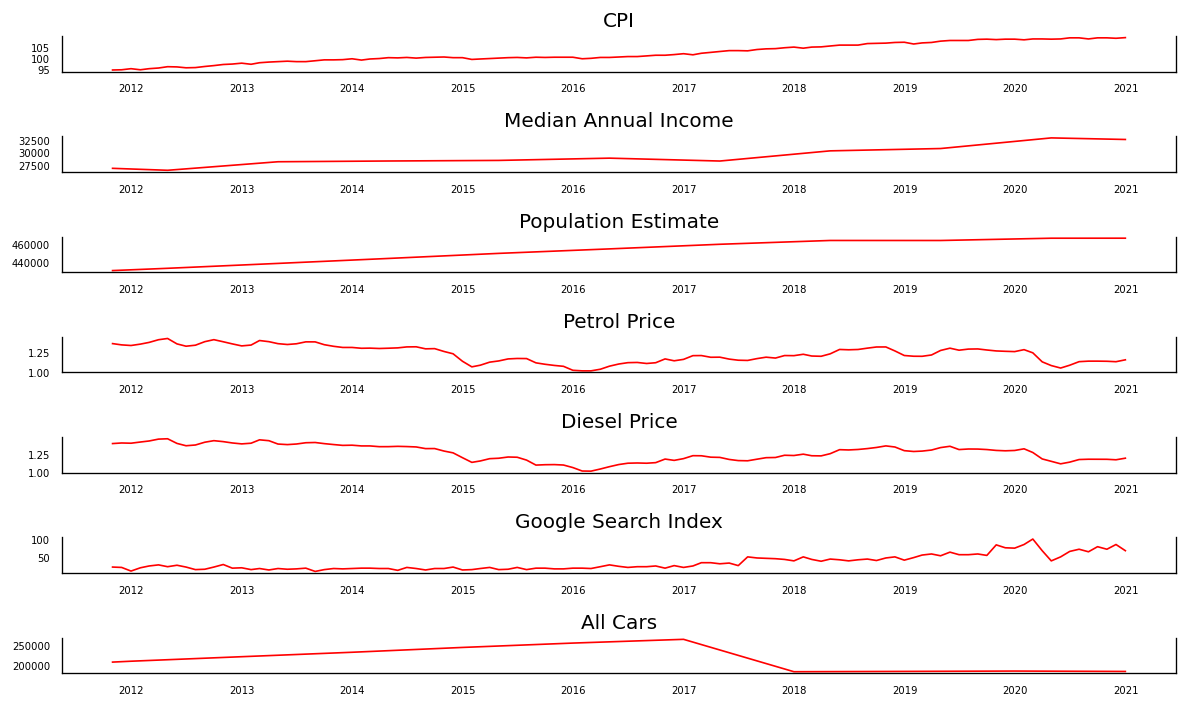

In [1035]:
fig, axes = plt.subplots(nrows=7, ncols=1, dpi=120, figsize=(10,6))
for i, ax in enumerate(axes.flatten()):
    data = df[df.columns[i]]
    ax.plot(data, color='red', linewidth=1)
    # Decorations
    ax.set_title(df.columns[i])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout();

In [1036]:
from statsmodels.tsa.stattools import grangercausalitytests
maxlag=12
test = 'ssr_chi2test'
def grangers_causation_matrix(data, variables, test='ssr_chi2test', verbose=False):    
    """Check Granger Causality of all possible combinations of the Time series.
    The rows are the response variable, columns are predictors. The values in the table 
    are the P-Values. P-Values lesser than the significance level (0.05), implies 
    the Null Hypothesis that the coefficients of the corresponding past values is 
    zero, that is, the X does not cause Y can be rejected.

    data      : pandas dataframe containing the time series variables
    variables : list containing names of the time series variables.
    """
    df = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in df.columns:
        for r in df.index:
            test_result = grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            df.loc[r, c] = min_p_value
    df.columns = [var + '_x' for var in variables]
    df.index = [var + '_y' for var in variables]
    return df

grangers_causation_matrix(df, variables = df.columns)        


,CPI_x,Median Annual Income_x,Population Estimate_x,Petrol Price_x,Diesel Price_x,Google Search Index_x,All Cars_x,ULEV_x
CPI_y,1.0000,0.1585,0.0305,0.0000,0.0000,0.0637,0.0245,0.1845
Median Annual Income_y,0.0001,1.0000,0.0266,0.0013,0.0041,0.0000,0.0000,0.0121
Population Estimate_y,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000
Petrol Price_y,0.0928,0.0639,0.0971,1.0000,0.0525,0.2123,0.3445,0.2109
Diesel Price_y,0.4431,0.2540,0.1810,0.3312,1.0000,0.1988,0.1441,0.2902
Google Search Index_y,0.0000,0.0001,0.0012,0.0038,0.0059,1.0000,0.0293,0.0001
All Cars_y,0.0009,0.0000,0.0000,0.0001,0.0000,0.0026,1.0000,0.0000
ULEV_y,0.1302,0.0001,0.1302,0.1496,0.0154,0.0334,0.0000,1.0000


In [1037]:
from statsmodels.tsa.vector_ar.vecm import coint_johansen

def cointegration_test(df, alpha=0.05): 
    """Perform Johanson's Cointegration Test and Report Summary"""
    out = coint_johansen(df,-1,5)
    d = {'0.90':0, '0.95':1, '0.99':2}
    traces = out.lr1
    cvts = out.cvt[:, d[str(1-alpha)]]
    def adjust(val, length= 6): return str(val).ljust(length)

    # Summary
    print('Name   ::  Test Stat > C(95%)    =>   Signif  \n', '--'*20)
    for col, trace, cvt in zip(df.columns, traces, cvts):
        print(adjust(col), ':: ', adjust(round(trace,2), 9), ">", adjust(cvt, 8), ' =>  ' , trace > cvt)

cointegration_test(df)

Name   ::  Test Stat > C(95%)    =>   Signif  
 ----------------------------------------
CPI    ::  346.58    > 143.6691  =>   True
Median Annual Income ::  257.32    > 111.7797  =>   True
Population Estimate ::  193.5     > 83.9383   =>   True
Petrol Price ::  133.67    > 60.0627   =>   True
Diesel Price ::  86.53     > 40.1749   =>   True
Google Search Index ::  45.12     > 24.2761   =>   True
All Cars ::  15.52     > 12.3212   =>   True
ULEV   ::  5.41      > 4.1296    =>   True


In [1038]:
df.shape

(111, 8)

In [1039]:
nobs = 12
df_train, df_test = df[0:-nobs], df[-nobs:]

# Check size
print(df_train.shape)  # (119, 8)
print(df_test.shape)  # (4, 8)

(99, 8)
(12, 8)


In [1040]:
def adfuller_test(series, signif=0.05, name='', verbose=False):
    """Perform ADFuller to test for Stationarity of given series and print report"""
    r = adfuller(series, autolag='AIC')
    output = {'test_statistic':round(r[0], 4), 'pvalue':round(r[1], 4), 'n_lags':round(r[2], 4), 'n_obs':r[3]}
    p_value = output['pvalue'] 
    def adjust(val, length= 6): return str(val).ljust(length)

    # Print Summary
    print(f'    Augmented Dickey-Fuller Test on "{name}"', "\n   ", '-'*47)
    print(f' Null Hypothesis: Data has unit root. Non-Stationary.')
    print(f' Significance Level    = {signif}')
    print(f' Test Statistic        = {output["test_statistic"]}')
    print(f' No. Lags Chosen       = {output["n_lags"]}')

    for key,val in r[4].items():
        print(f' Critical value {adjust(key)} = {round(val, 3)}')

    if p_value <= signif:
        print(f" => P-Value = {p_value}. Rejecting Null Hypothesis.")
        print(f" => Series is Stationary.")
    else:
        print(f" => P-Value = {p_value}. Weak evidence to reject the Null Hypothesis.")
        print(f" => Series is Non-Stationary.")    


In [1041]:
for name, column in df_train.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "CPI" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -0.3371
 No. Lags Chosen       = 12
 Critical value 1%     = -3.509
 Critical value 5%     = -2.896
 Critical value 10%    = -2.585
 => P-Value = 0.9201. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "Median Annual Income" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = 0.0254
 No. Lags Chosen       = 1
 Critical value 1%     = -3.5
 Critical value 5%     = -2.892
 Critical value 10%    = -2.583
 => P-Value = 0.9606. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "Population Estimate" 
    -----------------------------------------------
 Null 

In [1042]:
#1st differentiation
df_differenced = df_train.diff().dropna()
for name, column in df_differenced.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "CPI" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -1.1775
 No. Lags Chosen       = 11
 Critical value 1%     = -3.509
 Critical value 5%     = -2.896
 Critical value 10%    = -2.585
 => P-Value = 0.6832. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "Median Annual Income" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -0.9717
 No. Lags Chosen       = 12
 Critical value 1%     = -3.51
 Critical value 5%     = -2.896
 Critical value 10%    = -2.585
 => P-Value = 0.7634. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "Population Estimate" 
    -----------------------------------------------
 Nu

In [1043]:
#2nd differentiation
df_differenced = df_differenced.diff().dropna()
# ADF Test on each column of 1st Differences Dataframe
for name, column in df_differenced.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "CPI" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -3.6955
 No. Lags Chosen       = 12
 Critical value 1%     = -3.511
 Critical value 5%     = -2.897
 Critical value 10%    = -2.585
 => P-Value = 0.0042. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "Median Annual Income" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -6.8911
 No. Lags Chosen       = 11
 Critical value 1%     = -3.51
 Critical value 5%     = -2.896
 Critical value 10%    = -2.585
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "Population Estimate" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationa

In [1044]:
model = VAR(df_differenced)
for i in [1,2,3,4,5,6,7]:
    result = model.fit(i)
    print('Lag Order =', i)
    print('AIC : ', result.aic)
    print('BIC : ', result.bic)
    print('FPE : ', result.fpe)
    print('HQIC: ', result.hqic, '\n')

Lag Order = 1
AIC :  21.33060932718899
BIC :  23.25387047078987
FPE :  1843675884.8786232
HQIC:  22.108022907108083 

Lag Order = 2
AIC :  21.466955884390238
BIC :  25.123032276576275
FPE :  2170272009.183774
HQIC:  22.944285043507048 

Lag Order = 3
AIC :  21.63173315495448
BIC :  27.04299864914598
FPE :  2754632602.7707376
HQIC:  23.8174883541487 

Lag Order = 4
AIC :  20.819100373929487
BIC :  28.00841506417099
FPE :  1424632577.2951186
HQIC:  23.7219399915098 

Lag Order = 5
AIC :  20.714834280514438
BIC :  29.705558772602323
FPE :  1697780186.1394005
HQIC:  24.34356686432584 

Lag Order = 6
AIC :  18.4314604973492
BIC :  29.247470679267934
FPE :  279317117.6084329
HQIC:  22.795046950383032 

Lag Order = 7
AIC :  18.289201242693963
BIC :  30.954903572367307
FPE :  540101753.327077
HQIC:  23.396756926743564 



C:\Users\anich\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


In [1045]:
model_fitted = model.fit(3)
model_fitted.summary()
from statsmodels.stats.stattools import durbin_watson
out = durbin_watson(model_fitted.resid)

for col, val in zip(df.columns, out):
    print(col,':', round(val, 2))

CPI : 2.21
Median Annual Income : 1.98
Population Estimate : 2.02
Petrol Price : 2.22
Diesel Price : 2.24
Google Search Index : 2.18
All Cars : 2.01
ULEV : 1.92


In [1046]:
# Get the lag order
lag_order = model_fitted.k_ar
print(lag_order)  #> 3

# Input data for forecasting
forecast_input = df_differenced.values[-lag_order:]
forecast_input

3


array([[-3.00000e-01,  5.97542e+00,  6.80050e+00,  1.50000e-03,
        -5.50000e-03,  3.30000e+01,  2.00000e+00,  1.00000e+00],
       [ 4.00000e-01, -5.97542e+00, -6.80050e+00,  7.00000e-03,
         7.10000e-03, -3.70000e+01, -2.00000e+00,  4.00000e+00],
       [-2.00000e-01,  5.97542e+00,  6.80060e+00,  9.00000e-04,
         9.80000e-03,  7.00000e+00,  3.00000e+00,  2.00000e+00]])

In [1047]:
# Forecast
fc = model_fitted.forecast(y=forecast_input, steps=nobs)
df_forecast = pd.DataFrame(fc, index=df.index[-nobs:], columns=df.columns + '_2d')
df_forecast

,CPI_2d,Median Annual Income_2d,Population Estimate_2d,Petrol Price_2d,Diesel Price_2d,Google Search Index_2d,All Cars_2d,ULEV_2d
Date,,,,,,,,
2020-01-31,0.048888,44.510321,11.313796,-0.011526,-0.006757,10.746688,731.320556,-19.022461
2020-02-29,-0.249258,-8.987042,-32.208336,0.016513,0.005305,-5.091387,-327.580684,24.883605
2020-03-31,0.349019,-26.091104,4.177637,-0.009330,-0.006023,-3.916027,-112.915112,-2.252253
2020-04-30,-0.251948,23.065614,18.366070,0.002444,0.005413,4.381744,424.737183,2.658913
2020-05-31,0.229050,-3.877882,-16.459454,0.000256,-0.003650,-0.460993,-142.771629,2.460690
2020-06-30,-0.255867,4.359371,-2.613590,-0.001563,0.000367,-2.385441,140.952788,-3.222244
2020-07-31,0.159680,-1.785984,0.562386,-0.001159,-0.001289,2.022191,-13.091751,1.786559
2020-08-31,-0.042093,8.393662,-0.787021,0.000972,0.001762,0.064810,-6.032751,0.248677
2020-09-30,0.003372,-3.905924,-5.938188,0.002734,0.001077,-1.098369,-82.554886,2.966996


In [1048]:
def invert_transformation(df_train, df_forecast, second_diff=False):
    """Revert back the differencing to get the forecast to original scale."""
    df_fc = df_forecast.copy()
    columns = df_train.columns
    for col in columns:        
        # Roll back 2nd Diff
        if second_diff:
            df_fc[str(col)+'_1d'] = (df_train[col].iloc[-1]-df_train[col].iloc[-2]) + df_fc[str(col)+'_2d'].cumsum()
        # Roll back 1st Diff
        df_fc[str(col)+'_forecast'] = df_train[col].iloc[-1] + df_fc[str(col)+'_1d'].cumsum()
    return df_fc

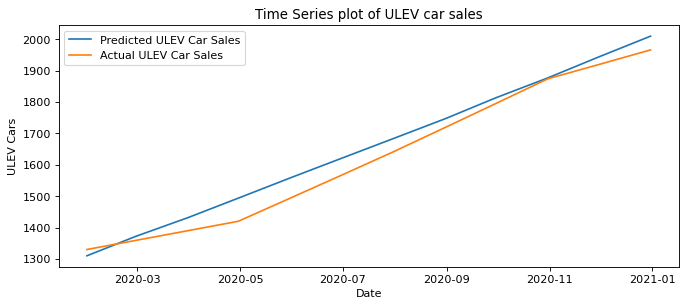

In [1049]:
df_results = invert_transformation(df_train, df_forecast, second_diff=True)        
df_results.loc[:, ['CPI_forecast','Median Annual Income_forecast','Petrol Price_forecast','Diesel Price_forecast','Google Search Index_forecast', 'All Cars_forecast','ULEV_forecast']]
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(figsize=(10,4), dpi=80)
plt.plot(df_results["ULEV_forecast"])
plt.plot(df_test["ULEV"][-nobs:])
plt.xlabel("Date")
plt.ylabel("ULEV Cars")
plt.title("Time Series plot of ULEV car sales")
plt.legend(['Predicted ULEV Car Sales', 'Actual ULEV Car Sales'])

PREDICTING ULEV CAR SALES till 2026:

In [1050]:
fc = model_fitted.forecast(y=forecast_input, steps=84)
df_forecast_2027 = pd.DataFrame(fc, index=df_future.index[-84:], columns=df_future.columns + '_2d')
df_results = invert_transformation(df_train, df_forecast_2027, second_diff=True)        
df_results['ULEV_forecast']


Date
2020-01-31    1309.977539
2020-02-29    1371.838682
2020-03-31    1431.447572
2020-04-30    1493.715376
2020-05-31    1558.443869
                 ...     
2026-08-31    8041.873066
2026-09-30    8152.838755
2026-10-31    8264.449547
2026-11-30    8376.705441
2026-12-31    8489.606438
Name: ULEV_forecast, Length: 84, dtype: float64

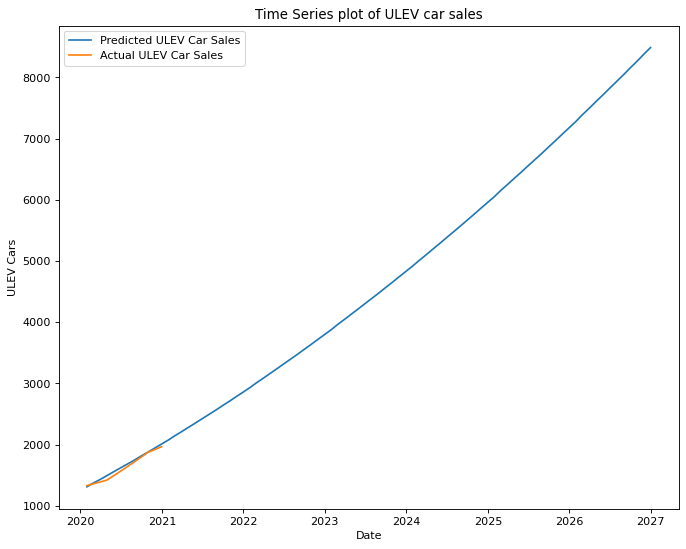

In [1051]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(figsize=(10, 8), dpi=80)
plt.plot(df_results["ULEV_forecast"])
plt.plot(df_test["ULEV"][-nobs:])
plt.xlabel("Date")
plt.ylabel("ULEV Cars")
plt.title("Time Series plot of ULEV car sales")
plt.legend(['Predicted ULEV Car Sales', 'Actual ULEV Car Sales'])
